# PSTAT 234 Group Project: Hate Crime Data

__PSTAT 234 Group Project members: Wenlu Gou, Nhan Huynh, Zach Terner, and Laura Urbisci__  
__Presentation date: June 14th from 12:00 - 3:00 pm__

___

##Project overview:

For the PSTAT 234 Final Group Project, we analyzed the hate crimes data set found in the [FiveThirtyEight Github repositiory](https://github.com/fivethirtyeight/data/tree/master/hate-crimes). The data set contains reported hate crime statistics in the United States broken up by state as well as demographic information for five years before and ten days after Trump was elected President. Bash and Python were used for the analysis.  


The Jupyter notebook for this project is broken into a five sections: 
- Extracting the data
- Pre-analysis and visualization
- Analyzing the data
- Model building 
- Conclusion

The Jupyter notebook will be converted to slides using the steps outlined here (https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67).

## Extracting the data 

This section of the notebook contains the packages needed to run all of the code in this notebook in addition to the code used for data extraction.  


We obtained data from the following sources:
1. The main data is based on a .csv file found in [FiveThirtyEight Github repositiory on hate crimes](https://github.com/fivethirtyeight/data/tree/master/hate-crimes)
2. We scraped a table on [Wikipedia](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_religiosity) based on Pew Research Center's study to identify the overall religious status.
3. We scraped a table from an article published by the [Denver Post](https://www.denverpost.com/2015/10/08/chart-compare-the-average-age-in-each-u-s-state-2005-2014/) to obtain median age for each state. 
4. We also looked into how the country was divided during the Civil War to identify which states can be classfied as conservative  (**Note:** 2, 3, and 4 are the additional covariates we'd like add into the main data frame in 1). 

We first install  and import all the important packages for the analysis.
### Installation

In [1]:
! pip install lxml

    100% |████████████████████████████████| 5.7MB 5.2MB/s 


In [2]:
# install plotly package
! pip install plotly

In [0]:
! python -c "import plotly; plotly.tools.set_credentials_file(username='nhanhuynh', api_key='Y6hY7vdVGfrm6WJztBi3')"

In [4]:
! pip install pydotplus

    100% |████████████████████████████████| 286kB 5.5MB/s 
  Running setup.py bdist_wheel for pydotplus ... - done
  Stored in directory: /content/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [5]:
! dot -Tps tree.dot -o tree.ps 

/bin/sh: 1: dot: not found


In [6]:
!apt-get install libqtscript4-svg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dbus fontconfig libapparmor1 libaudio2 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdbus-1-3 libjbig0 liblcms2-2 libmng2
  libmysqlclient20 libqt4-dbus libqt4-declarative libqt4-network libqt4-script
  libqt4-sql libqt4-sql-mysql libqt4-svg libqt4-xml libqt4-xmlpatterns
  libqtcore4 libqtdbus4 libqtgui4 libqtscript4-core libtiff5 libxi6 libxt6
  mysql-common qdbus qt-at-spi qtchooser qtcore4-l10n
Suggested packages:
  default-dbus-session-bus | dbus-session-bus nas cups-common liblcms2-utils
  libqt4-declarative-folderlistmodel libqt4-declarative-gestures
  libqt4-declarative-particles libqt4-declarative-shaders qt4-qmlviewer
  libqt4-dev libicu55 libthai0 qt4-qtconfig
The following NEW packages will be installed:
  dbus fontconfig libapparmor1 libaudio2 libavahi-client3 libavahi-common-data
  libavahi-common3 lib

Unpacking libqtcore4:amd64 (4:4.8.7+dfsg-7ubuntu1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../05-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package libqt4-xml:amd64.
Preparing to unpack .../06-libqt4-xml_4%3a4.8.7+dfsg-7ubuntu1_amd64.deb ...
Unpacking libqt4-xml:amd64 (4:4.8.7+dfsg-7ubuntu1) ...
Selecting previously unselected package libqtdbus4:amd64.
Preparing to unpack .../07-libqtdbus4_4%3a4.8.7+dfsg-7ubuntu1_amd64.deb ...
Unpacking libqtdbus4:amd64 (4:4.8.7+dfsg-7ubuntu1) ...
Selecting previously unselected package libqt4-script:amd64.
Preparing to unpack .../08-libqt4-script_4%3a4.8.7+dfsg-7ubuntu1_amd64.deb ...
Unpacking libqt4-script:amd64 (4:4.8.7+dfsg-7ubuntu1) ...
Selecting previously unselected package libqtscript4-core:amd64.
Preparing to unpack .../09-libqtscript4-core_0.2.0-1_amd64.deb ...
Unpacking libqtscript4-core:amd64 (0.2.0-1) ...
Selecting

Selecting previously unselected package libqt4-sql-mysql:amd64.
Preparing to unpack .../33-libqt4-sql-mysql_4%3a4.8.7+dfsg-7ubuntu1_amd64.deb ...
Unpacking libqt4-sql-mysql:amd64 (4:4.8.7+dfsg-7ubuntu1) ...
Selecting previously unselected package qt-at-spi:amd64.
Preparing to unpack .../34-qt-at-spi_0.4.0-5_amd64.deb ...
Unpacking qt-at-spi:amd64 (0.4.0-5) ...
Setting up libxi6:amd64 (2:1.7.9-1) ...
Setting up liblcms2-2:amd64 (2.7-1ubuntu1) ...
Setting up libjbig0:amd64 (2.1-3.1) ...
Setting up qtcore4-l10n (4:4.8.7+dfsg-7ubuntu1) ...
Setting up mysql-common (5.8+1.0.2ubuntu1) ...
update-alternatives: using /etc/mysql/my.cnf.fallback to provide /etc/mysql/my.cnf (my.cnf) in auto mode
Setting up qtchooser (63-g13a3d08-1) ...
Setting up libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Setting up libmng2:amd64 (2.0.2-0ubuntu3) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libqtcore4:amd64 (4:4.8.7+dfsg-7ubuntu1) ...
Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Sett

In [7]:
!pip install graphviz

In [8]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3 libgvc6
  libgvpr2 libharfbuzz0b libltdl7 libpango-1.0-0 libpangocairo-1.0-0
  libpangoft2-1.0-0 libpathplan4 libpixman-1-0 libthai-data libthai0 libwebp6
  libxaw7 libxcb-render0 libxcb-shm0 libxmu6 libxpm4
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libltdl7 libpango-1.0-0 libpangocairo-1.0-0
  libpangoft2-1.0-0 libpathplan4 libpixman-1-0 libthai-data libthai0 libwebp6
  libxaw7 libxcb-render0 libxcb-shm0 libxmu6 libxpm4
0 upgraded, 24 newly installed, 0 to remove and 0 not upgraded.
Need to get 3,608 kB of archives.
After this operation, 19.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.co

Preparing to unpack .../12-libthai0_0.1.26-3_amd64.deb ...
Unpacking libthai0:amd64 (0.1.26-3) ...
Selecting previously unselected package libpango-1.0-0:amd64.
Preparing to unpack .../13-libpango-1.0-0_1.40.12-1_amd64.deb ...
Unpacking libpango-1.0-0:amd64 (1.40.12-1) ...
Selecting previously unselected package libgraphite2-3:amd64.
Preparing to unpack .../14-libgraphite2-3_1.3.10-2_amd64.deb ...
Unpacking libgraphite2-3:amd64 (1.3.10-2) ...
Selecting previously unselected package libharfbuzz0b:amd64.
Preparing to unpack .../15-libharfbuzz0b_1.4.2-1_amd64.deb ...
Unpacking libharfbuzz0b:amd64 (1.4.2-1) ...
Selecting previously unselected package libpangoft2-1.0-0:amd64.
Preparing to unpack .../16-libpangoft2-1.0-0_1.40.12-1_amd64.deb ...
Unpacking libpangoft2-1.0-0:amd64 (1.40.12-1) ...
Selecting previously unselected package libpangocairo-1.0-0:amd64.
Preparing to unpack .../17-libpangocairo-1.0-0_1.40.12-1_amd64.deb ...
Unpacking libpangocairo-1.0-0:amd64 (1.40.12-1) ...
Selecting p

### Import installed packages

In [9]:
# importing all of the necessary python packages

import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cluster import KMeans
from copy import deepcopy
from urllib.request import urlopen
from bs4 import BeautifulSoup
from lxml import html
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from numpy.random import randn
import collections
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale 
import statsmodels.api as sm
from scipy import stats
import matplotlib
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz as g

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



### Download data 

In [10]:
%%bash
wget https://raw.githubusercontent.com/fivethirtyeight/data/master/hate-crimes/hate_crimes.csv

--2018-06-09 18:58:33--  https://raw.githubusercontent.com/fivethirtyeight/data/master/hate-crimes/hate_crimes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4405 (4.3K) [text/plain]
Saving to: ‘hate_crimes.csv’

     0K ....                                                  100% 54.7M=0s

2018-06-09 18:58:34 (54.7 MB/s) - ‘hate_crimes.csv’ saved [4405/4405]



In [11]:
! head hate_crimes.csv

In [12]:
crimes = pd.read_csv("hate_crimes.csv")
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
state                                       51 non-null object
median_household_income                     51 non-null int64
share_unemployed_seasonal                   51 non-null float64
share_population_in_metro_areas             51 non-null float64
share_population_with_high_school_degree    51 non-null float64
share_non_citizen                           48 non-null float64
share_white_poverty                         51 non-null float64
gini_index                                  51 non-null float64
share_non_white                             51 non-null float64
share_voters_voted_trump                    51 non-null float64
hate_crimes_per_100k_splc                   47 non-null float64
avg_hatecrimes_per_100k_fbi                 50 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 4.9+ KB


### Data scraping 



In [13]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_religiosity")
soup = BeautifulSoup(res.content,"html5lib") # import content of the webpage in html 
table = soup.find_all('table')[1] # find the second table
df = pd.read_html(str(table))[0]
df = df.drop(df.index[[0,30,53,54,55,56]]).iloc[:,[0,4]] # delete records that are U.S. territories and select only first and last column
df.columns = ["state","percent_religious"]
df.percent_religious = df.percent_religious.str[-3:].str[0:2] # clean up the format
df.percent_religious = df. percent_religious.astype(float)
df.percent_religious = df. percent_religious/100
df.head()

,state,percent_religious
1,California,0.73
2,Texas,0.82
3,Florida,0.76
4,New York,0.73
5,Illinois,0.78


In [14]:
# check if all states in df are the same and in crimes:
stateDF = df.state.unique()
stateDF.sort()
stateCr = crimes.state.unique()
stateCr.sort()
stateDF == stateCr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [0]:
# merge df into crimes using state column:
crimes = pd.merge(crimes,df,on=["state"],how="inner")

In [16]:
# List of states and their groups during the Civil War:
union = ["Maine","New York","New Hampshire","Vermont","Massachusetts","Connecticut","Rhode Island","Pennsylvania","New Jersey","Ohio", "Indiana", "Illinois", "Kansas", "Michigan", "Wisconsin", "Minnesota", "Iowa", "California", "Nevada", "Oregon"]
confederacy = ["Texas", "Arkansas", "Louisiana", "Tennessee", "Mississippi", "Alabama", "Georgia", "Florida", "South Carolina", "North Carolina", "Virginia"]


def civilWar(state):
  if state in union:
    return 'union'
  elif state in confederacy:
    return 'confe'
  else: return 'none'
  

# add the civilWar column:
crimes['civilWar'] = crimes['state'].apply(civilWar)
crimes.civilWar.unique()

array(['confe', 'none', 'union'], dtype=object)

In [17]:
# convert civilWar column to categorical variable
crimes.civilWar = crimes.civilWar.astype('category')
crimes.civilWar.value_counts()

union    20
none     20
confe    11
Name: civilWar, dtype: int64

In [18]:
age = requests.get("https://www.denverpost.com/2015/10/08/chart-compare-the-average-age-in-each-u-s-state-2005-2014/")
soup = BeautifulSoup(age.content, "lxml") 
table = soup.find_all('table')[0]
age = pd.read_html(str(table))[0].iloc[:,[0,2]]
age.columns =['state','medianAge']
age.head()

,state,medianAge
0,Alabama,38.6
1,Alaska,33.3
2,Arizona,36.9
3,Arkansas,37.8
4,California,36.0


In [19]:
# check if all states in age df are the same and in crimes:
stateAge = age.state.unique()
stateAge.sort()
stateAge == stateCr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [0]:
# merge Age df into Crimes df using state column:
crimes = pd.merge(crimes,age,on=["state"],how="inner")

In [0]:
# Translate US states to two letter codes (in order to create US map in Plotly package)
postal = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
soup = BeautifulSoup(postal.content, "lxml") 
table = soup.find_all('table')[0]
postal = pd.read_html(str(table))[0].iloc[:,[0,2]]
postal.columns = ["state","abbr"]
# merge postal df into crimes df using state column:
crimes = pd.merge(crimes,postal,on=["state"],how="inner")

In [22]:
postal.head()

,state,abbr
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


## Pre-analysis and visualization

### Data cleaning
In this study, we want to compare the hate crimes in two periods: (a) from 2010 - 2015 and (b) the first 10 days after Trump was elected President in the 58th quadrennial American presidential election. The statistics on hate crimes from these two periods are recorded in different scales as the unit in pre-election hate crimes is annually average (per 100,000 population) from 2010 to 2015 while post-election hate crimes is the 10-day average (per 100,000 population) from November 9 -18, 2016. We convert the pre-election group to the 10-day average unit before proceeding the analysis.  
<br>
In addition, there are three columns that have missing data. Observations are missing for the field that describes the share of the population that are not U.S. citizens in 2015 (`share_non_citizen`), hate crimes per 100,000 population from Nov. 9-18, 2016 (`hate_crimes_per_100k_splc`), and average annual hate crimes per 100,000 population in 2010-2015 (`avg_hatecrimes_per_100k_fbi`).

#### Fill missing values in the predictors

We observe that the column `share_non_citizen` has some missing values. We will impute these missing values based on an external source published on [Henry J Kaiser Family Foundation](https://www.kff.org/other/state-indicator/distribution-by-citizenship-status/?currentTimeframe=0&selectedRows=%7B%22states%22:%7B%22mississippi%22:%7B%7D%7D%7D&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D). Note: the time frame of the external table on population distribution by citizenship status in each state is in 2016 while `share_non_citizen` is recorded in 2015. According to the table, all three states (Maine, Mississippi, and South Dakota) with missing values have 1% of share of the population that are not U.S. citizens in 2016.  
<br>
We also compare the mean of share of the population that are not U.S. citizens between before and after filling the missing values , the difference is not significant. 




In [23]:
crimes["fbi_standardized_pre"] = crimes["avg_hatecrimes_per_100k_fbi"]/36.525

crimes.info() # structure of data - we see there is missing data in share non citizen, hate crimes per 100K, ave hate crimes, and therefore fbi standardized

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 17 columns):
state                                       51 non-null object
median_household_income                     51 non-null int64
share_unemployed_seasonal                   51 non-null float64
share_population_in_metro_areas             51 non-null float64
share_population_with_high_school_degree    51 non-null float64
share_non_citizen                           48 non-null float64
share_white_poverty                         51 non-null float64
gini_index                                  51 non-null float64
share_non_white                             51 non-null float64
share_voters_voted_trump                    51 non-null float64
hate_crimes_per_100k_splc                   47 non-null float64
avg_hatecrimes_per_100k_fbi                 50 non-null float64
percent_religious                           51 non-null float64
civilWar                                    51 non-null category
med

In [24]:
crimes[['fbi_standardized_pre','hate_crimes_per_100k_splc']].describe()

,fbi_standardized_pre,hate_crimes_per_100k_splc
count,50.000000,47.000000
mean,0.064822,0.304093
std,0.046933,0.252709
min,0.007308,0.067447
25%,0.035404,0.142707
50%,0.054403,0.226197
75%,0.087183,0.356935
max,0.299890,1.522302


We observe the presence of missing values in the data

In [25]:
# number of missing values in pre-election group
crimes['fbi_standardized_pre'].isnull().sum()

1

In [26]:
# number of missing values in post-election
crimes['hate_crimes_per_100k_splc'].isnull().sum()

4

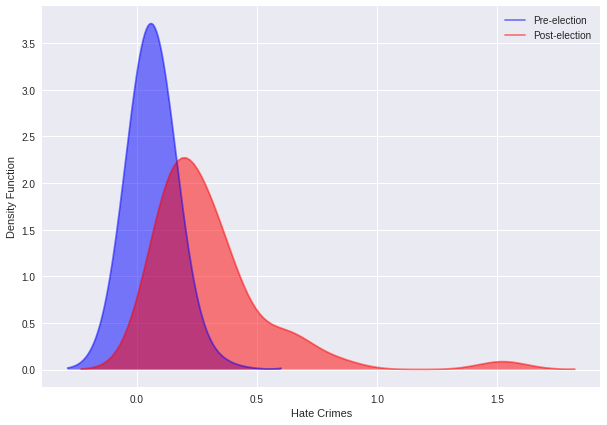

In [27]:
# create a data set that doesn't contain missing values in these groups and examine the density functions:
subCrimes = crimes[['fbi_standardized_pre','hate_crimes_per_100k_splc']].dropna() 

fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(subCrimes['fbi_standardized_pre'],shade=True,label='Pre-election',color='b',bw=.1,alpha=0.5)
sns.kdeplot(subCrimes['hate_crimes_per_100k_splc'],shade=True,label='Post-election',color='r',bw=.1,alpha=.5)
ax.set(xlabel='Hate Crimes', ylabel='Density Function')

plt.show()

In [28]:
trace0 = go.Box(x=subCrimes['fbi_standardized_pre'],name = 'Pre-election',boxpoints='all',jitter=0.5,pointpos=-5,boxmean=True)
trace1 = go.Box(x=subCrimes['hate_crimes_per_100k_splc'],name = 'Post-election',boxpoints='all',jitter=0.5,pointpos=-5,boxmean=True)

data = [trace0, trace1]
py.iplot(data)

#### Paired-test
We ran a paired t-test to see if the number of hate crimes before the election is different than after the election. We found using a level of significance of  $\alpha =5\%$ that there is a significant between the number of hate crimes when Trump was elected. 



In [29]:
#Do the matched pairs t-test (can add it later)
sp.stats.ttest_rel(subCrimes['fbi_standardized_pre'],subCrimes['hate_crimes_per_100k_splc'])


Ttest_relResult(statistic=-7.495528831936415, pvalue=1.654572061433733e-09)

#### Clustering - to fill in missing values in the predictors
We used clustering to impute the missing values in the response variables. 



In [0]:
crimes = crimes.set_index('state') # set state column as row index
# run this code once

In [31]:
crimes[crimes['share_non_citizen'].isnull()].share_non_citizen

state
Maine          NaN
Mississippi    NaN
South Dakota   NaN
Name: share_non_citizen, dtype: float64

In [32]:
# mean of share_non_citizen before filling missing values
crimes.share_non_citizen.mean()

0.054583333333333324

In [33]:
# share_non_citizen has 3 missing values (NaN) in Main, Mississippi, and South Dakota. 
# Replace these missing values with 1% from the Kaiser Family Foundation:
crimes.loc[['Maine','Mississippi','South Dakota'],'share_non_citizen'] = .01
crimes.share_non_citizen.mean()

0.05196078431372548

### Visualization
We use a variety of plots to visualize the data (i.e. pair plots, correlation plot, density plots
religous percentages by state plot, and boxplots). 


Transform the data from wide format to long format, then drop row IDs with missing values:

In [0]:
colsToDrop = ['avg_hatecrimes_per_100k_fbi'] # remove some columns out 
crimesL = crimes.drop(colsToDrop, axis=1)
# renames some columns 
crimesL = crimesL.rename(columns={'hate_crimes_per_100k_splc': 'post', 'fbi_standardized_pre': 'pre'})

# convert crimes from wide format to long format:
crimesL = pd.melt(crimesL,id_vars=['median_household_income','share_unemployed_seasonal','share_population_in_metro_areas','share_population_with_high_school_degree','share_non_citizen','share_white_poverty', 'gini_index', 'share_non_white','share_voters_voted_trump','percent_religious', 'civilWar', 'medianAge','abbr'],var_name='time', value_name='hateCrimes')
crimesL = crimesL.dropna()

To understand the relationship between `share_voters_voted_trump` and `share_population_with_high_school_degree` on `hateCrimes` before and after the election, we can create a bubble plot as follows:

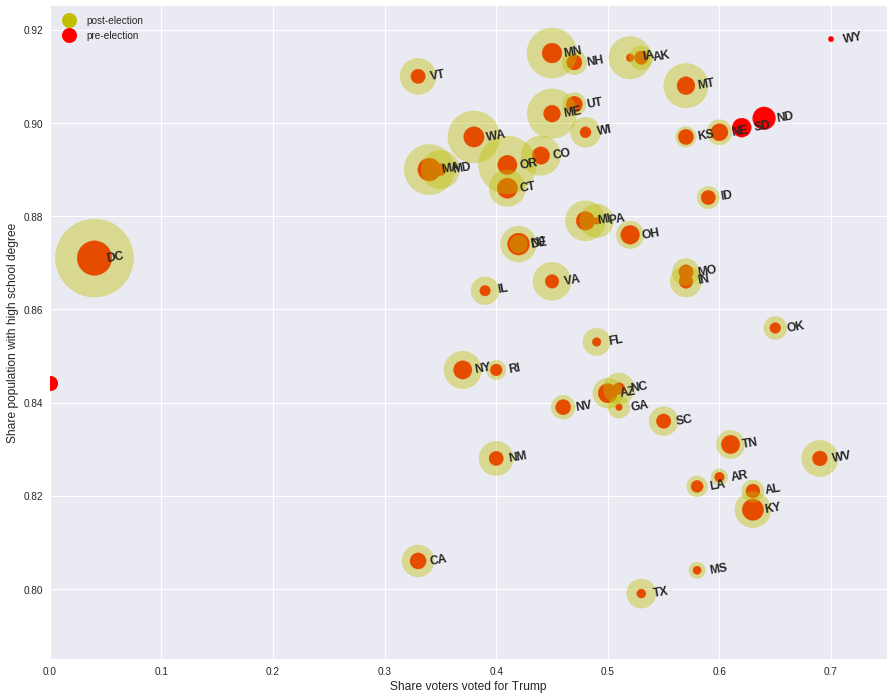

In [35]:
post = crimesL[crimesL.time=="post"].loc[:,["share_voters_voted_trump","share_population_with_high_school_degree","hateCrimes","abbr"]]
post['abbr'] = post['abbr'].astype(str)
pre = crimesL[crimesL.time=="pre"].loc[:,["share_voters_voted_trump","share_population_with_high_school_degree","hateCrimes","abbr"]]
pre['abbr'] = pre['abbr'].astype(str)

fig, ax = plt.subplots(figsize=(15,12))

plt.scatter(np.array(pre.share_voters_voted_trump),y=np.array(pre.share_population_with_high_school_degree),s=np.array(pre.hateCrimes)*4000,data=pre,alpha=1,color="r")   
plt.scatter(x=np.array(post.share_voters_voted_trump),y=np.array(post.share_population_with_high_school_degree),s=np.array(post.hateCrimes)*4000,data=post,alpha=0.4,color="y")   

plt.axis([0,0.75,0.785,0.925])
ax.set_xlabel('Share voters voted for Trump')
ax.set_ylabel('Share population with high school degree')
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

z = randn(10)
yellow_dot, = plt.plot(z, "yo", markersize=15)
red_dot, =plt.plot(z, "ro", markersize=15)
plt.legend([yellow_dot, red_dot],["post-election","pre-election"],loc=2)

for i, txt in list(enumerate(np.array(pre.abbr))):
    plt.annotate(np.array(txt), (np.array(pre.share_voters_voted_trump)[i]+0.01,np.array(pre.share_population_with_high_school_degree)[i]), size=12, weight='bold',rotation=10)

plt.show()


From the above plot, we observe that DC seems to be an outlier as it is away from the bulk of the data points. Specifically, the distance between its value  and other states' values in `share_voters_voted_trump` is significant. The large difference in radius between after and post-election circles indicates hate crimes increases rapidly right after the election. Some states only have red circles as they have missing values in hate crimes after the election. We will handle the missing values in the next section. 

To better understand the relationship between these covariates on `hateCrimes` for other states except DC , let's "zoom in" the plot:

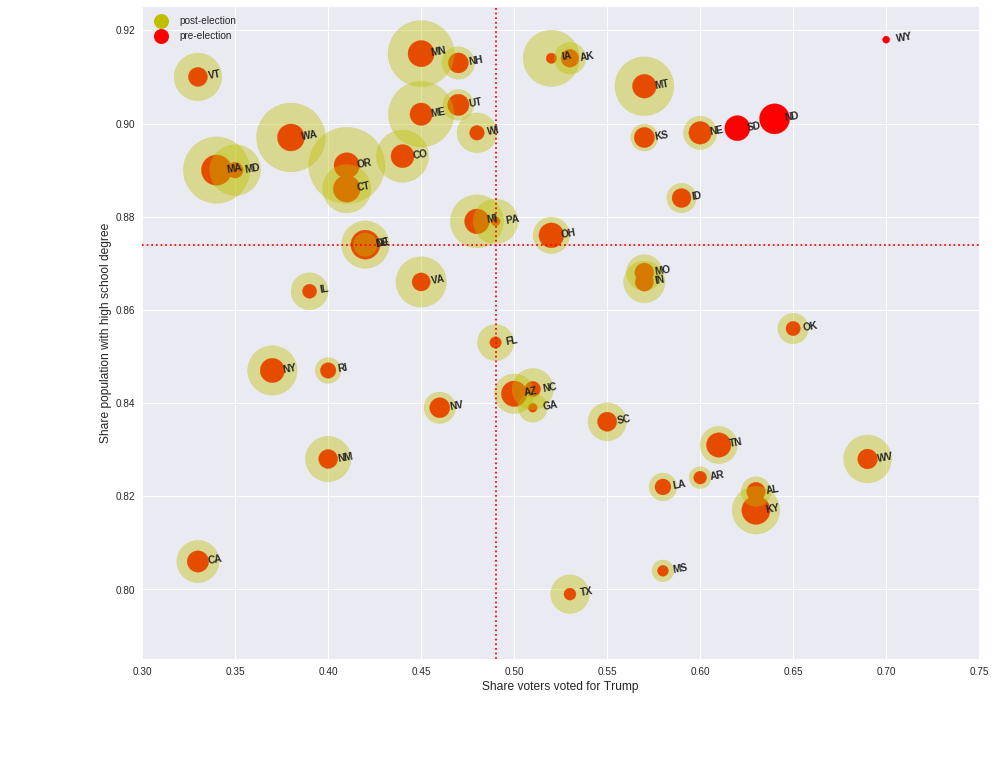

In [36]:
# If remove DC and re-do the plot (to zoom in)
fig, ax = plt.subplots(figsize=(15,12))

plt.scatter(np.array(pre.share_voters_voted_trump),y=np.array(pre.share_population_with_high_school_degree),s=np.array(pre.hateCrimes)*7000,data=pre,alpha=1,color="r")   
plt.scatter(x=np.array(post.share_voters_voted_trump),y=np.array(post.share_population_with_high_school_degree),s=np.array(post.hateCrimes)*7000,data=post,alpha=.4,color="y")   
# add quantiles lines:
plt.axhline(y=crimesL.share_population_with_high_school_degree[crimesL['abbr']!="DC"].quantile(.5), color='r', linestyle=':')
plt.axvline(x=crimesL.share_voters_voted_trump[crimesL['abbr']!="DC"].quantile(.5), color='r', linestyle=':')

plt.axis([0.3,0.75,0.785,0.925])
ax.set_xlabel('Share voters voted for Trump')
ax.set_ylabel('Share population with high school degree')
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

z = randn(10)
yellow_dot, = plt.plot(z, "yo", markersize=15)
red_dot, =plt.plot(z, "ro", markersize=15)
plt.legend([yellow_dot, red_dot],["post-election","pre-election"],loc=2)

for i, txt in list(enumerate(np.array(pre.abbr))):
    plt.annotate(np.array(txt), (np.array(pre.share_voters_voted_trump)[i]+0.005,np.array(pre.share_population_with_high_school_degree)[i]), size=10, weight='bold',rotation=10)

plt.show()

This "zoom-in" plot provides some further insight about the relationship between these variables. We add two additional lines which are the medians of `share_voters_voted_trump` (the red vertical line) and `share_population_with_high_school_degree` (the red horizontal line). 
A lot of states in the upper left corner have large values in hate crimes compared to other states (the circles are bigger). The upper left corner is where the share voters voted for Trump below the national average and the share population with high school degree is above the national average. The rises in hate crimes after the election seems to be significant for these states.



We further compute the difference in hate crimes after and before the election (for only states without missing values for now), where:

$$diffCrimes = \text{hate_crimes_per_100k_splc} - \text{fbi_standardized_pre}$$

Then, we calculate the correlation matrix and visualize it:

---



In [0]:
crimesCorr  = crimes.copy()
crimesCorr  = crimesCorr.dropna()
crimesCorr['diffCrimes'] = crimesCorr.hate_crimes_per_100k_splc - crimesCorr.fbi_standardized_pre

topdropCorr = ['civilWar','abbr','avg_hatecrimes_per_100k_fbi','hate_crimes_per_100k_splc','fbi_standardized_pre']
crimesCorr =  crimesCorr.drop(topdropCorr, axis=1)

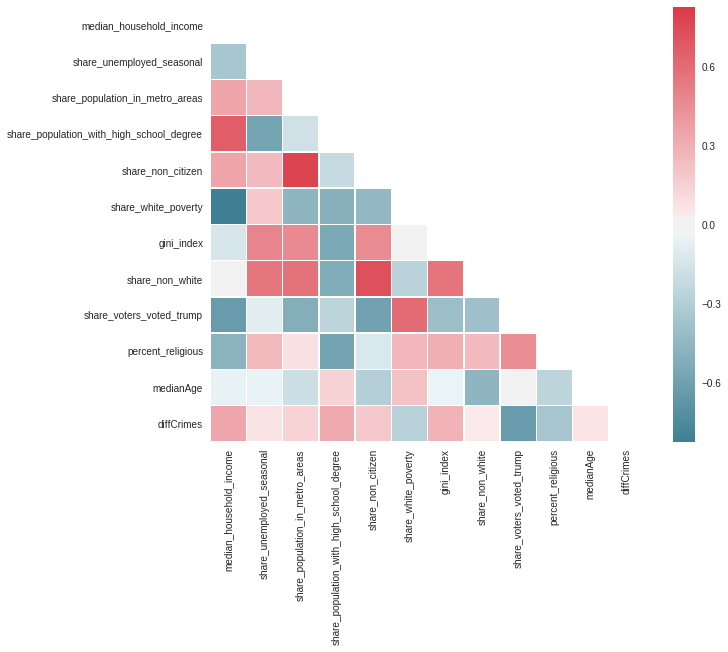

In [38]:
# Heat map for the correlation matrix
corr = crimesCorr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.set(style="white")

fig, ax = plt.subplots(figsize=(10, 8))
f1 = sns.heatmap(corr, mask=mask, cmap=cmap, xticklabels=corr.columns.values,yticklabels=corr.columns.values, vmax=.3, center=0,
            square=True, linewidths=.5)
plt.show()

In the correlation plot, observe that some covariates are highly correlated and their correlation makes good sense demographically. For example, `share_non_citizen` and `share_population_in_metro_areas` have a strong positive correlation (correlation coefficient is $.77$) or `share_white_poverty` and `median_household_income` have a negative correlation of $-.83$. We want to pay a close attention to these correlation for the model building procedures. 

Similarly, we can examine the relationships between the covariates on the difference in hate crimes. The bubble plot we created early reflects the negative correlation between `share_voters_voted_trump` and the rises in hate crimes. With the correlation matrix, we have a concrete coefficient to measure their linear relationship. If we assume there are no other variables in the data, the linear coefficient between the two variables is $-.64$. Indeed, for states that have lower `share_voters_voted_trump`, the difference in hate crimes tend to increase. 

We also notice that the additional variable we added into the data, `percent_religious`, has an intermediate and negative correlation with `diffCrimes`(coefficient of $-0.36$) while its correlation with `share_population_with_high_school_degree` is the highest ($-0.58$) among all the covariates available in the data. We can futher explore their relationship in the scatter plot below:

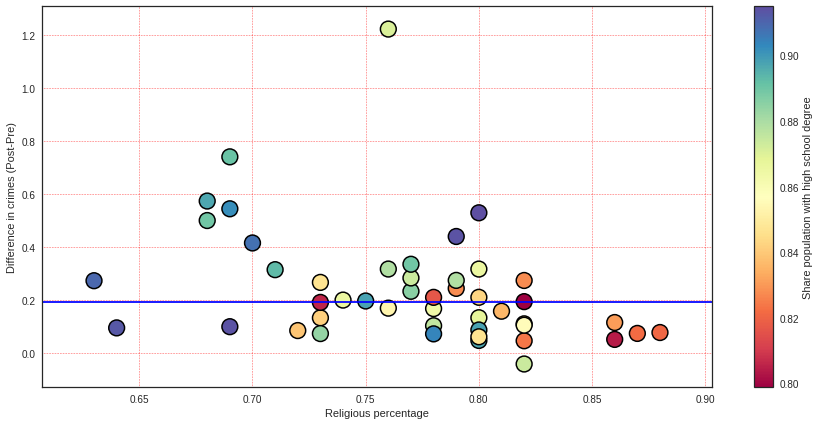

In [39]:
fig, ax = plt.subplots(figsize=(15,7))

ax.grid(color='r', linestyle=':', linewidth=0.6)
plt.axhline(y=crimesCorr['diffCrimes'].quantile(.5), color='b', linestyle='-')

plt.scatter(x=crimesCorr['percent_religious'], y=crimesCorr['diffCrimes'], c=crimesCorr['share_population_with_high_school_degree'], 
            cmap='Spectral',s=250,edgecolors="k",linewidth=1.5)

ax.set_xlabel('Religious percentage')
ax.set_ylabel('Difference in crimes (Post-Pre)')
cbar = plt.colorbar()
cbar.set_label('Share population with high school degree')
plt.show()

We produce a scatter plot between the difference in hate crimes  (y-axis) versus the religious percentage (x-axis). We color each data point using the value of share population with high school degree. The blue line is the 50% quantile of the difference in hate crimes. Since `percent_religious` has a negative correlated coefficient with `diffCrimes`, we observe the linear and negative slope in the above plot. Based on the colorbar, states with the highest values in `share_population_with_high_school_degree` and small percentage in religion, difference in hate crimes seems to be higher than the average.  Similarly, states with the smallest values in `share_population_with_high_school_degree` and the greatest values in `percent_religious`, the difference in hate crimes is below the average level. 

We also create a pair plot to see the relationship between each pair of the covariates in the data:

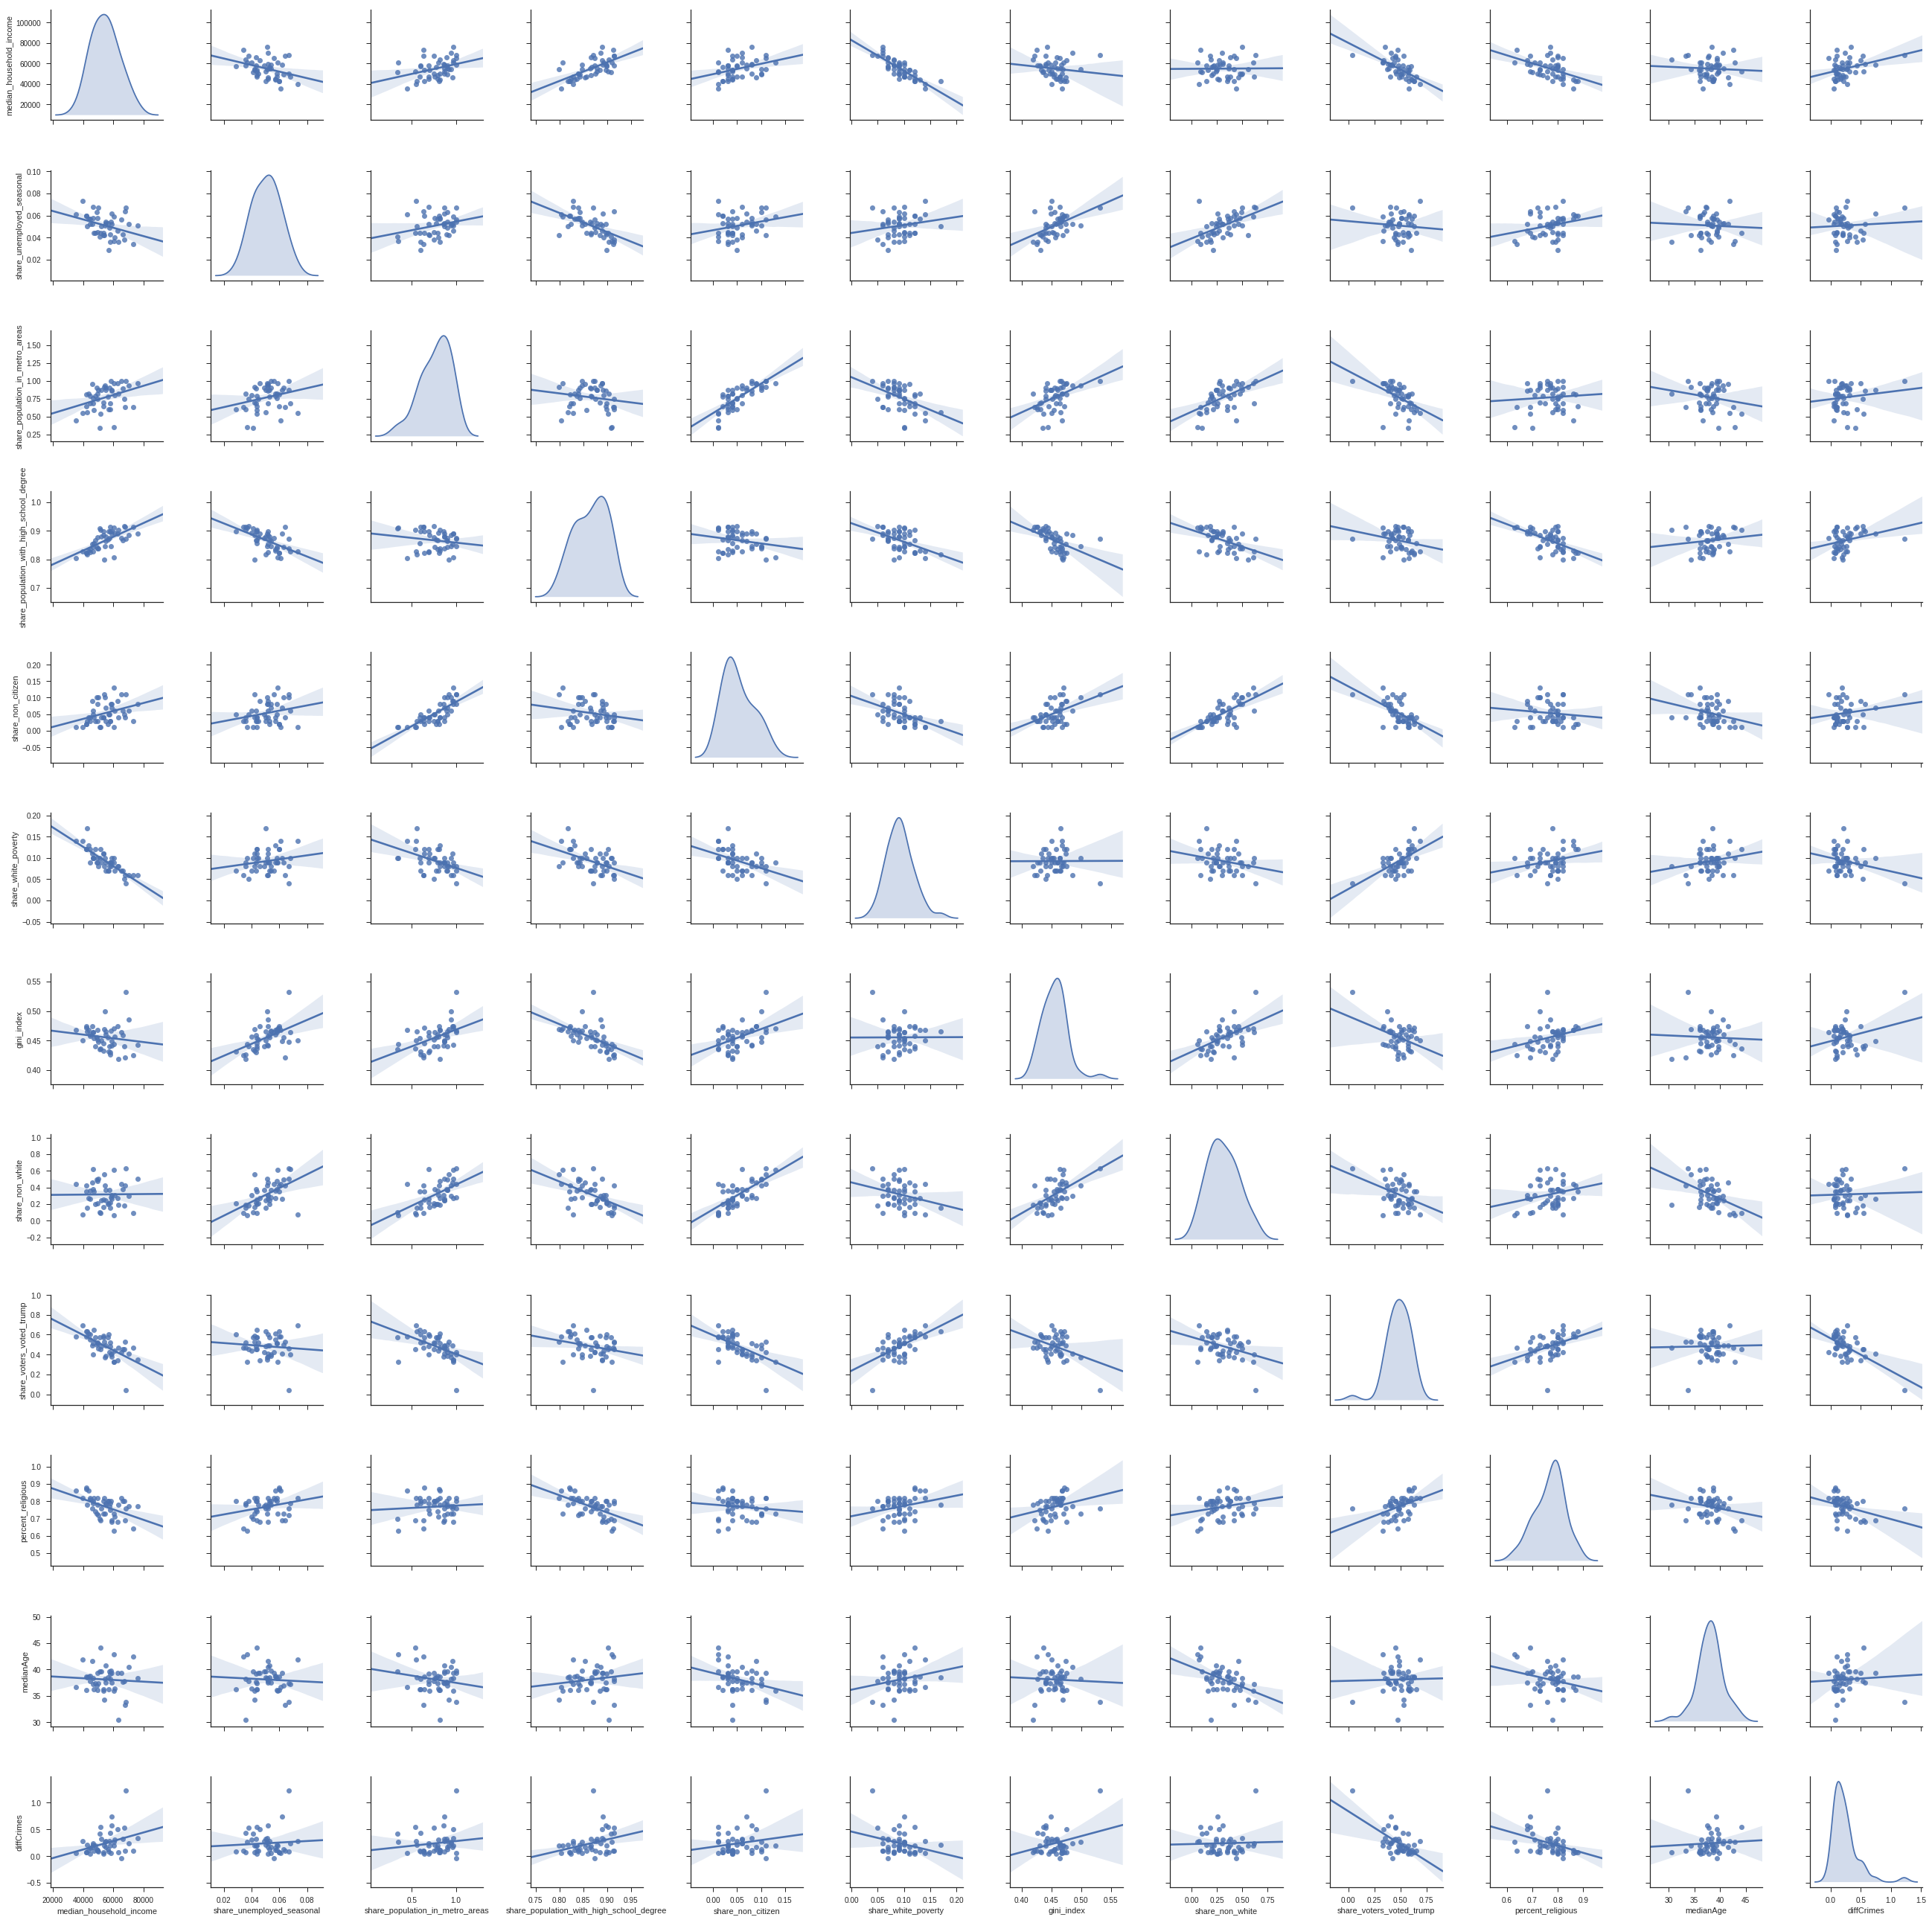

In [40]:
# create the scatter plot:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(crimesCorr,kind="reg",size=3,diag_kind="kde",diag_kws=dict(shade=True),palette="husl")

One of the additional variables in this data is `civilWar`, which is coded as a categorical variable. We can examine the distribution in difference in hate crimes for each level in `civilWar` to see if civil war factors affect the hate crimes:

In [0]:
crimesCivil  = crimes.copy()
crimesCivil  = crimesCivil.dropna()
crimesCivil['diffCrimes'] = crimesCivil.hate_crimes_per_100k_splc - crimesCivil.fbi_standardized_pre

In [42]:
trace0 = go.Box(x=crimesCivil.diffCrimes[crimesCivil['civilWar']=="union"],name = 'Union',boxpoints='all',jitter=0.5,pointpos=-5,boxmean=True)
trace1 = go.Box(x=crimesCivil.diffCrimes[crimesCivil['civilWar']=="confe"],name = 'Confederacy',boxpoints='all',jitter=0.5,pointpos=-5,boxmean=True)
trace2 = go.Box(x=crimesCivil.diffCrimes[crimesCivil['civilWar']=="none"],name = 'None',boxpoints='all',jitter=0.5,pointpos=-5,boxmean=True)

data = [trace0, trace1, trace2]
py.iplot(data)


K Means Clustering for the Hate Crime

In [0]:
#Make a copy
crimes_deep_ref = deepcopy(crimes)

In [0]:
crimes2 = crimes_deep_ref
type(crimes2)

#Look at the columns
crimes2.columns

covariates = crimes2.drop(columns=['avg_hatecrimes_per_100k_fbi','hate_crimes_per_100k_splc', 'fbi_standardized_pre','abbr','civilWar'], axis=1)


In [45]:
print(covariates)

                      median_household_income  share_unemployed_seasonal  \
state                                                                      
Alabama                                 42278                      0.060   
Alaska                                  67629                      0.064   
Arizona                                 49254                      0.063   
Arkansas                                44922                      0.052   
California                              60487                      0.059   
Colorado                                60940                      0.040   
Connecticut                             70161                      0.052   
Delaware                                57522                      0.049   
District of Columbia                    68277                      0.067   
Florida                                 46140                      0.052   
Georgia                                 49555                      0.058   
Hawaii      

In [46]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(covariates)
kmeans.labels_

array([2, 3, 4, 4, 5, 5, 0, 5, 3, 4, 4, 0, 1, 1, 4, 5, 1, 2, 2, 1, 0, 3,
       1, 3, 2, 5, 1, 5, 4, 0, 3, 4, 1, 4, 5, 4, 4, 5, 1, 5, 4, 1, 2, 1,
       3, 5, 3, 5, 2, 5, 1], dtype=int32)

In [47]:
#Add the cluster column as a column

crimes2["cluster_id"] = kmeans.labels_
#Impute using it by group_by cluster and finding the average for each one.

#Will require adding old columns also.

crimes2.head()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,percent_religious,civilWar,medianAge,abbr,fbi_standardized_pre,cluster_id
state,,,,,,,,,,,,,,,,,
Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410,0.88,confe,38.6,AL,0.049457,2
Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700,0.69,none,33.3,AK,0.045358,3
Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,0.73,none,36.9,AZ,0.093468,4
Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209,0.82,confe,37.8,AR,0.023798,4
California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986,0.73,union,36.0,CA,0.065653,5


In [48]:
crimes2[["abbr","cluster_id"]].sort_values(by=["cluster_id"])

#Clusters visualized below.

,abbr,cluster_id
state,,
New Hampshire,NH,0
Maryland,MD,0
Hawaii,HI,0
Connecticut,CT,0
Michigan,MI,1
Illinois,IL,1
Idaho,ID,1
Montana,MT,1
Wyoming,WY,1


In [49]:
#Find the frequency for each type of cluster
frq=collections.Counter(kmeans.labels_)
print(frq)

Counter({5: 12, 4: 11, 1: 11, 3: 7, 2: 6, 0: 4})


In [50]:
#crimes2.info()

#Group by cluster ID to get the means of the hate crimes per 100k SPLC for the different clusters.
crimes2.groupby(["cluster_id"]).mean()["hate_crimes_per_100k_splc"]

cluster_id
0    0.285794
1    0.309873
2    0.192672
3    0.500348
4    0.187642
5    0.356692
Name: hate_crimes_per_100k_splc, dtype: float64

In [51]:
#Assign the means of each cluster to the corresponding missing entry.

#Find the states and cluster IDs with missing hate_crimes_per_100k_splc.
crimes2[crimes2["hate_crimes_per_100k_splc"].isnull()]["cluster_id"]



state
Hawaii          0
North Dakota    5
South Dakota    1
Wyoming         1
Name: cluster_id, dtype: int32

In [0]:
#Assign them the missing values.
crimes2.loc["Hawaii","hate_crimes_per_100k_splc"] = .285794
crimes2.loc["North Dakota","hate_crimes_per_100k_splc"] = .356692
crimes2.loc["South Dakota","hate_crimes_per_100k_splc"] = .309873
crimes2.loc["Wyoming","hate_crimes_per_100k_splc"] = .309873


In [53]:
#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
     
    #This colors it with rainbow colors.
        colorscale = 'Rainbow',
        autocolorscale = False,
        
    #This reverses the color scale
        #reversescale = True,
        locations = crimes['abbr'],
        z = crimes2['cluster_id'].astype(int),
        locationmode = 'USA-states',
        marker = dict(
             line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Clustering based on covariates")
        )]

layout = dict(
        title = 'Clustering of United States by covariates',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
py.iplot( fig, filename='covariate-cluster-plot' )

##Model

1. found the difference of hate crimes before and after election
2. what else did we do? - add to this section




**Find the difference of hate crime before and after election**

In [0]:
#Make a copy for Crimes2
crimes_diff = deepcopy(crimes2)
#Hawaii doesn't have fbi_standardized_pre data

In [55]:
#Find the cluster0 fbi_standardized_pre mean
crimes_diff.groupby(["cluster_id"]).mean()["fbi_standardized_pre"][0]

0.06574063054528861

In [0]:
#Assign Hawaii the missing value by the group mean
crimes_diff.loc["Hawaii","fbi_standardized_pre"] = 0.065741

In [0]:
#Find the difference between before and after election
crimes_diff["difference"] = crimes_diff["hate_crimes_per_100k_splc"] - crimes_diff["fbi_standardized_pre"]

In [58]:
#Sort the difference 
crimes_diff[["abbr","difference"]].sort_values(by=["difference"])

,abbr,difference
state,,
New Jersey,NJ,-0.042521
Arkansas,AR,0.045263
Kansas,KS,0.046453
Mississippi,MS,0.050397
Rhode Island,RI,0.060287
Utah,UT,0.071275
Idaho,ID,0.072426
Louisiana,LA,0.073014
Alabama,AL,0.076382


In [59]:
#Plot the differences 

#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
     
    #This colors it with rainbow colors.
        colorscale = 'Rainbow',
        autocolorscale = False,
        
    #This reverses the color scale
        #reversescale = True,
        locations = crimes['abbr'],
        z = crimes_diff['difference'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
             line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Scaled after-before difference in crimes")
        )]

layout = dict(
        title = 'Difference in hate crimes after the election',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
py.iplot( fig, filename='difference-crime-plot' )

###PCA

This section of code below does Principal Component Analysis or PCA.

In [60]:
covariates.head()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,percent_religious,medianAge
state,,,,,,,,,,,
Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.88,38.6
Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.69,33.3
Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.73,36.9
Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.82,37.8
California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.73,36.0


In [61]:
X_std = StandardScaler().fit_transform(covariates)

pca = PCA(n_components=2)

pca.fit(X_std)
print(pca.components_)

[[ 0.18365147  0.22661434  0.4295111  -0.15073897  0.45387143 -0.25069526
   0.32777502  0.40968821 -0.38768191 -0.01502004 -0.11430187]
 [-0.47484114  0.33778512  0.0140106  -0.48960377 -0.03685514  0.38490557
   0.26697265  0.11534279  0.22659519  0.36680417 -0.02322334]]


Interpretting PCA loadings:
- PCA1: (income, unemployed, metro, non citizen, gini, non white) vs (high school degreee, white povety, voted trump, percent religious, median age)
- PCA2: (income, high school degree, non citizen, median age) vs(unemployed, metro, white poverty, gini, non white, voted trump, percent religous)



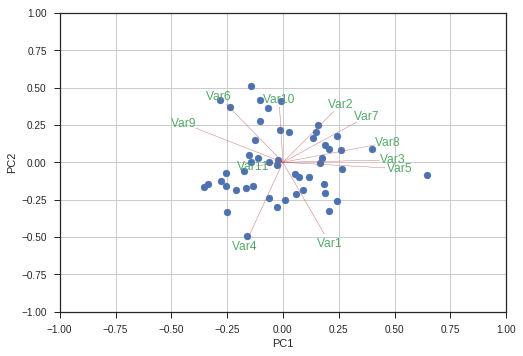

In [62]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
x_new = pca.fit_transform(X_std)

myplot(x_new,np.transpose(pca.components_))
#for i, txt in enumerate(covariates.index):
#    plt.annotate(txt, (x_new[:,0][i],x_new[:,1][i]))
plt.show()

In [63]:
print(pca.explained_variance_)

[3.97792071 3.41217218]


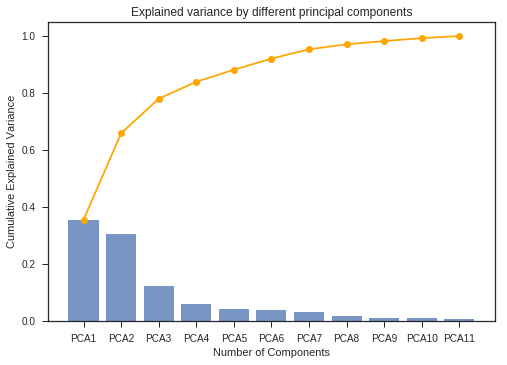

In [64]:
pca_all = PCA().fit(X_std)
objects = ('PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11')
y_pos = np.arange(len(objects))

plt.bar(y_pos, pca_all.explained_variance_ratio_, align='center', alpha=0.75)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_), color="orange", marker='o')
plt.xticks(y_pos, objects)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained variance by different principal components')
plt.show()


###Regression Tree on difference

In [93]:
#Define prediction indices
#predict_indices = [1,2,3,4,5,6,7,8,11,12,13,16,17]

#See if these work to get the columns we want
#crimes_diff.columns[predict_indices]


#Pick out the x and y variables for lasso usage
#Remove cluster_id but perhaps add it later as a dummy variable.
lasso_x = crimes_diff.drop(['hate_crimes_per_100k_splc','avg_hatecrimes_per_100k_fbi','civilWar','abbr','fbi_standardized_pre','cluster_id','difference'],axis = 1)

#Make crimes_diff a pandas dataframe
dummies_pd = pd.DataFrame(crimes_diff)

#Convert cluster_id to a string
dummies_pd['cluster_id'] = dummies_pd['cluster_id'].astype(str)

#Get the dummmies of cluster_ID and civilWar
dummies2 = pd.get_dummies(dummies_pd[['cluster_id','civilWar']])

#Concatenate the dummies to the lasso_x frame
lasso_x2 = pd.concat([pd.DataFrame(lasso_x), dummies2],axis=1)

#Make the response
lasso_y = crimes_diff['difference']

dummies2

,cluster_id_0,cluster_id_1,cluster_id_2,cluster_id_3,cluster_id_4,cluster_id_5,civilWar_confe,civilWar_none,civilWar_union
state,,,,,,,,,
Alabama,0,0,1,0,0,0,1,0,0
Alaska,0,0,0,1,0,0,0,1,0
Arizona,0,0,0,0,1,0,0,1,0
Arkansas,0,0,0,0,1,0,1,0,0
California,0,0,0,0,0,1,0,0,1
Colorado,0,0,0,0,0,1,0,1,0
Connecticut,1,0,0,0,0,0,0,0,1
Delaware,0,0,0,0,0,1,0,1,0
District of Columbia,0,0,0,1,0,0,0,1,0


In [65]:
crimes_diff.columns

Index(['median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump', 'hate_crimes_per_100k_splc',
       'avg_hatecrimes_per_100k_fbi', 'percent_religious', 'civilWar',
       'medianAge', 'abbr', 'fbi_standardized_pre', 'cluster_id',
       'difference'],
      dtype='object')

Text(0,0.5,'weights')

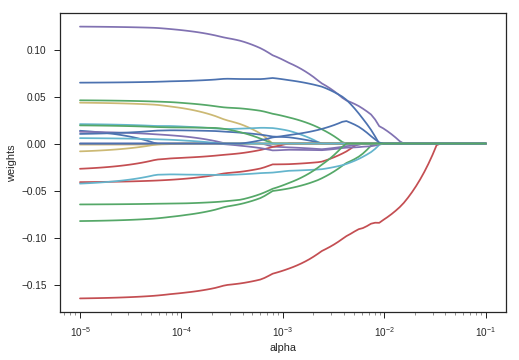

In [69]:

alphas = 10**np.linspace(-1,-5,100)*0.5
#Fit Lasso to choose predictors?

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(lasso_x2), lasso_y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')



In [70]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(lasso_x2, lasso_y)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(lasso_x2, lasso_y)

pd.Series(lasso.coef_, index=lasso_x2.columns)

median_household_income                     0.000000
share_unemployed_seasonal                   0.000000
share_population_in_metro_areas            -0.000000
share_population_with_high_school_degree    0.054692
share_non_citizen                          -0.000000
share_white_poverty                        -0.000000
gini_index                                  0.000000
share_non_white                            -0.000000
share_voters_voted_trump                   -0.569827
percent_religious                          -0.000000
medianAge                                   0.000000
cluster_id_0                               -0.000000
cluster_id_1                                0.000000
cluster_id_2                               -0.000000
cluster_id_3                                0.000000
cluster_id_4                               -0.000000
cluster_id_5                                0.000000
civilWar_confe                             -0.000000
civilWar_none                               0.

In [66]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(lasso_x2, lasso_y)

# Print coefficients with columns
pd.Series(regr.coef_, index=lasso_x2.columns)

X2 = sm.add_constant(lasso_x2)
est = sm.OLS(lasso_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     2.938
Date:                Fri, 08 Jun 2018   Prob (F-statistic):            0.00380
Time:                        16:50:21   Log-Likelihood:                 32.424
No. Observations:                  51   AIC:                            -26.85
Df Residuals:                      32   BIC:                             9.857
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [67]:
crimes_diff.head()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,percent_religious,civilWar,medianAge,abbr,fbi_standardized_pre,cluster_id,difference
state,,,,,,,,,,,,,,,,,,
Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410,0.88,confe,38.6,AL,0.049457,2,0.076382
Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700,0.69,none,33.3,AK,0.045358,3,0.098382
Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,0.73,none,36.9,AZ,0.093468,4,0.131852
Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209,0.82,confe,37.8,AR,0.023798,4,0.045263
California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986,0.73,union,36.0,CA,0.065653,5,0.190152


In [0]:
tree_covariates = deepcopy(lasso_x2)

In [108]:
# depth of tree: 5
reg_depth5 = DecisionTreeRegressor(max_depth=5)
reg_depth5_fit = reg_depth5.fit(tree_covariates,crimes_diff["difference"])
reg_depth5.feature_importances_

array([0.03019364, 0.04846031, 0.02108324, 0.22370472, 0.        ,
       0.        , 0.        , 0.00198629, 0.48785196, 0.16429275,
       0.02242708, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

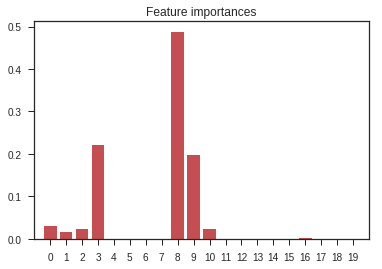

In [105]:
importances1 = reg_depth5_fit.feature_importances_
plt.figure()
plt.title("Feature importances")
plt.bar(range(tree_covariates.shape[1]), importances1,color="r")
plt.xticks(range(tree_covariates.shape[1]))
plt.xlim([-1, tree_covariates.shape[1]])
plt.show()

When the depth of tree is 5. There are 8 features are not 0.

Those features are:median_household_income,

 share_unemployed_seasonal,

'share_population_in_metro_areas',

 'share_population_with_high_school_degree',
 
 'share_voters_voted_trump',
 
 'percent_religious',
 
 'medianAge', 'cluster_id_1'

The most important feature is share_voters_voted_trump

In [91]:
reg_depth5_fit = reg_depth5.fit(tree_covariates,crimes_diff["difference"])
reg_depth5_fit

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [92]:
# depth of tree: 4
#There are 6 features are significant different from 0
reg_depth4 = DecisionTreeRegressor(max_depth=4)
reg_depth4_fit = reg_depth4.fit(tree_covariates,crimes_diff["difference"])
reg_depth4.feature_importances_

array([0.02921891, 0.03494991, 0.        , 0.23142781, 0.        ,
       0.52114155, 0.        , 0.        , 0.        , 0.17190199,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01135983, 0.        ])

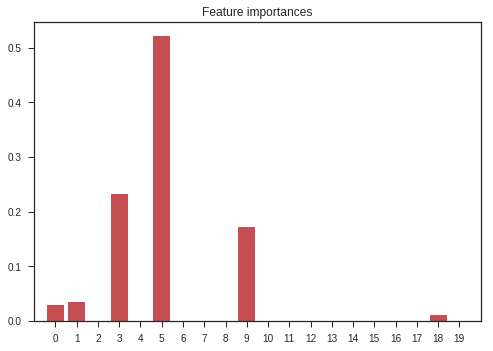

In [93]:
importances = reg_depth4.feature_importances_
plt.figure()
plt.title("Feature importances")
plt.bar(range(tree_covariates.shape[1]), importances,color="r")
plt.xticks(range(tree_covariates.shape[1]))
plt.xlim([-1, tree_covariates.shape[1]])
plt.show()

In [94]:
#The list for features
list(tree_covariates)
#5 Importan features: median_household_income,'share_unemployed_seasonal','share_population_with_high_school_degree','share_voters_voted_trump','percent_religious'
#The most important feature is 'share_voters_voted_trump'

['median_household_income',
 'share_unemployed_seasonal',
 'share_population_in_metro_areas',
 'share_population_with_high_school_degree',
 'share_non_citizen',
 'share_white_poverty',
 'gini_index',
 'share_non_white',
 'share_voters_voted_trump',
 'percent_religious',
 'medianAge',
 'cluster_id_0',
 'cluster_id_1',
 'cluster_id_2',
 'cluster_id_3',
 'cluster_id_4',
 'cluster_id_5',
 'civilWar_confe',
 'civilWar_none',
 'civilWar_union']

In [0]:
%matplotlib inline

export_graphviz(reg_depth4,out_file='tree.dot')
#export_graphviz(reg_depth4)


In [0]:
asdf = !cat tree.dot

In [102]:
with open("tree.dot") as f:
    dot_graph = f.read()

# remove the display(...)

g.Source(dot_graph)

AttributeError: ignored

In [114]:

Source.from_file('tree.dot', format='dot')

Error: <stdin>: syntax error in line 1 near 'name'


CalledProcessError: ignored

In [0]:
dot = g.Digraph()

In [0]:
df = lasso_x2
df['diff'] = lasso_y

In [97]:

features

'median_household_income+share_unemployed_seasonal+share_population_in_metro_areas+share_population_with_high_school_degree+share_non_citizen+share_white_poverty+gini_index+share_non_white+share_voters_voted_trump+percent_religious+medianAge+cluster_id_0+cluster_id_1+cluster_id_2+cluster_id_3+cluster_id_4+cluster_id_5+civilWar_confe+civilWar_none+civilWar_union+diff'

In [0]:

## try to fit a regular linear model:
%%capture
#gather features
features = "+".join(lasso_x2.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('diff ~' + features, df, return_type='dataframe')


In [0]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [102]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning:

divide by zero encountered in double_scalars



In [103]:
vif.round(1)

,VIF Factor,features
0,0.000000,Intercept
1,35.700000,median_household_income
2,3.100000,share_unemployed_seasonal
3,4.100000,share_population_in_metro_areas
4,8.100000,share_population_with_high_school_degree
5,7.400000,share_non_citizen
6,6.200000,share_white_poverty
7,4.300000,gini_index
8,7.200000,share_non_white
9,8.900000,share_voters_voted_trump


# Conclusion

1. Also need to add to this section